# Visualize results from auction

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import math
import pandas as pd
import seaborn as sns
import os

%matplotlib inline

logpath = os.path.join("logs", "auction_run_log" + ".csv")

names = ["bidder1", "bidder2", "bidder3"]
suffixes = ["", "", ""]

Qs = []
Qlogs = []
for name, suffix in zip(names, suffixes):
    Q = os.path.join("logs", name + suffix + ".txt")
    Qs.append(Q)
    Qlog = os.path.join("logs", name + "_Qlog" + suffix + ".csv")
    Qlogs.append(Qlog)

## Show Q development

In [4]:
# nbidders = len(names)
# fig, ax = plt.subplots(figsize=(20,5))
# title = "Q developments"
# fig.suptitle(title, fontsize=12)
# # fig.tight_layout()
# ax1 = plt.subplot(111)
# for ix, Qlog in enumerate(Qlogs):
#     Qlogdata = pd.read_csv(Qlog,
#                              index_col = 0,
#                              header = 0,
#                              skip_blank_lines = False)

#     # Find first instance of new phase
#     phases = Qlogdata["phase"].unique()
#     ixfirsts = []
#     for phase in phases:
#         ixfirst = Qlogdata["phase"].eq(phase).idxmax()
#         ixfirsts.append(ixfirst)
#     Qlogdata.drop(["phase"], axis = 1, inplace = True)
#     plt.subplot(1, nbidders, ix+1, sharex = ax1, sharey = ax1)
#     plt.plot(Qlogdata)
#     plt.legend(list(Qlogdata), loc='best')
#     plt.title(names[ix])
#     for ixfirstphase in ixfirsts:
#         plt.axvline(x=ixfirstphase)

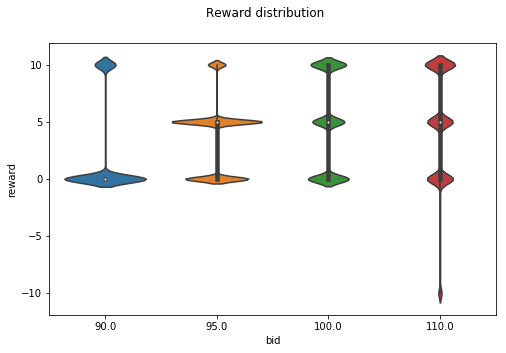

In [22]:
fig, axes = plt.subplots(1, 1, figsize=(8,5))
title = "Reward distribution"
fig.suptitle(title, fontsize=12)
logdata = pd.read_csv(logpath, skip_blank_lines=False)
ax = sns.violinplot(x="bid",
                    y="reward",
                    data=logdata,
                    inner="box")

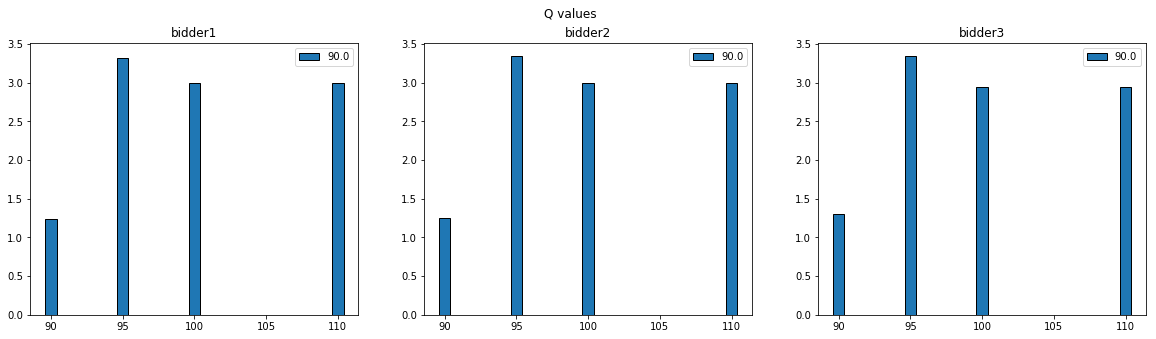

In [32]:
nbidders = len(names)
fig, ax = plt.subplots(figsize=(20,5))
title = "Q values"
fig.suptitle(title, fontsize=12)
ax1 = plt.subplot(111)

for ix, Qlog in enumerate(Qlogs):
    Qlogdata = pd.read_csv(Qlog,
                             index_col = 0,
                             header = 0,
                             skip_blank_lines = False)
    Qlogdata = Qlogdata.tail(1)
    Qlogdata.drop(["phase"], axis = 1, inplace = True)
    x = []
    y = []
    for name, series in Qlogdata.items():
        x.append(float(name))
        y.append(series.values)
    plt.subplot(1, nbidders, ix+1, sharex = ax1, sharey = ax1)
#     width = (max(bidder.bidspace)-min(bidder.bidspace))/(len(bidder.bidspace))
    bars = plt.bar(x, y, edgecolor='black')
    plt.legend(list(Qlogdata), loc='best')
    plt.title(names[ix])

In [2]:
def consthist(s):
    sfind = "history: "
    ixstart = s.find(sfind, 0) + len(sfind)
    ixend = s.find("]", ixstart) + 1
    his = str(s[ixstart : ixend])
#     bids = str(his.split(", "))
#     bids = str(item) for item in his.split(", ") if item.strip())
    return str(his)

# states = Qlogdata["state"].unique()
# state = states[0]
# print(consthist(state))

C:\Users\elias_000\Anaconda3\envs\py35\lib\site-packages\numpy\lib\arraysetops.py:463: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


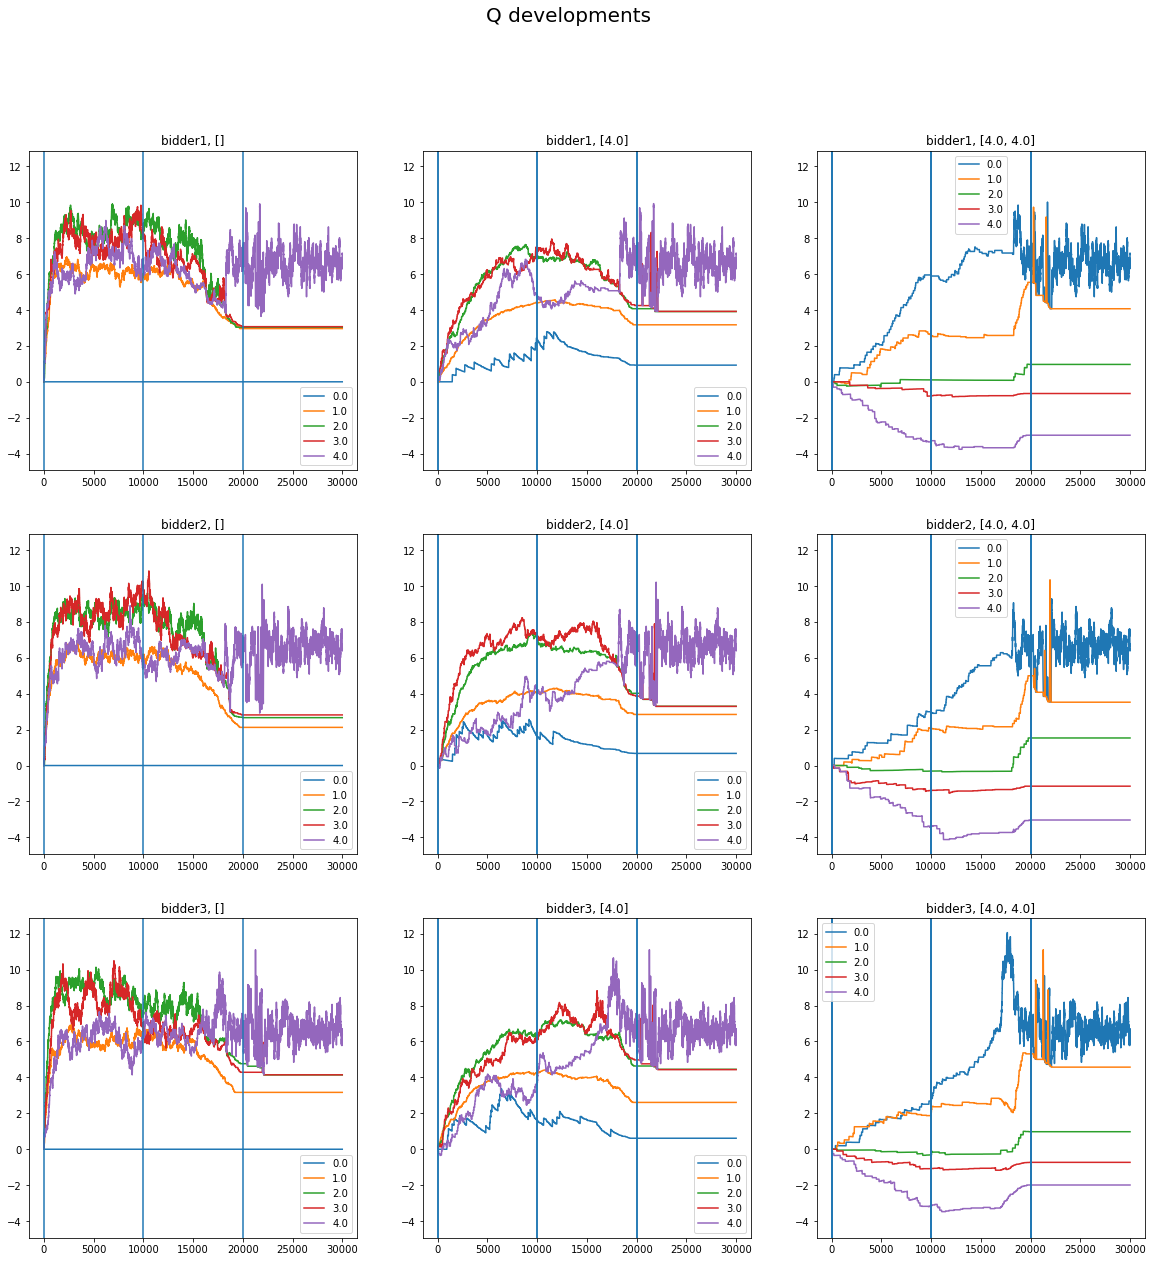

In [6]:
nbidders = len(names)
fig, ax = plt.subplots(figsize=(20,20))
title = "Q developments"
fig.suptitle(title, fontsize=20)
ax1 = plt.subplot(111)

# for ix, Qlog in enumerate([Qlogs[0]]):
for ix, Qlog in enumerate(Qlogs):
    Qlogdata = pd.read_csv(Qlog,
                             index_col = 0,
                             header = 0,
                             skip_blank_lines = False)
    Qlogdata["bids"] = Qlogdata["state"].apply(consthist)
    
    ixfirsts = []
    if ix == 0:
        bidlist = ['[4.0]', '[4.0, 4.0]', '[4.0, 4.0, ]']
    else:
        bidlist = ['[4.0]', '[4.0, 4.0]', '[4.0, 4.0, ]']
    
    nbids = len(bidlist)
#     print(Qlogdata["bids"].unique())
    for ixbid, bid in enumerate(bidlist):
        Qbiddata = Qlogdata.where(Qlogdata["bids"] == bid)
        Qbiddata = Qbiddata.dropna(axis=0, how='all')
        phases = Qlogdata["phase"].unique()
        for phase in phases:
            ixfirst = Qlogdata["phase"].eq(phase).idxmax()
            ixfirsts.append(ixfirst)
        Qbiddata["bids"] = Qbiddata["state"].apply(consthist)
#         print(Qbiddata.tail(2))
        Qbiddata.drop(["phase", "state", "bids"], axis = 1, inplace = True)
        plt.subplot(nbids, nbidders, ix*len(bidlist) + ixbid + 1, sharex = ax1, sharey = ax1)
        plt.plot(Qbiddata)
        plt.legend(list(Qbiddata), loc='best')
        plt.title(str(names[ix] + ", " + bid))
        for ixfirstphase in ixfirsts:
            plt.axvline(x=ixfirstphase)

ValueError: Array conditional must be same shape as self

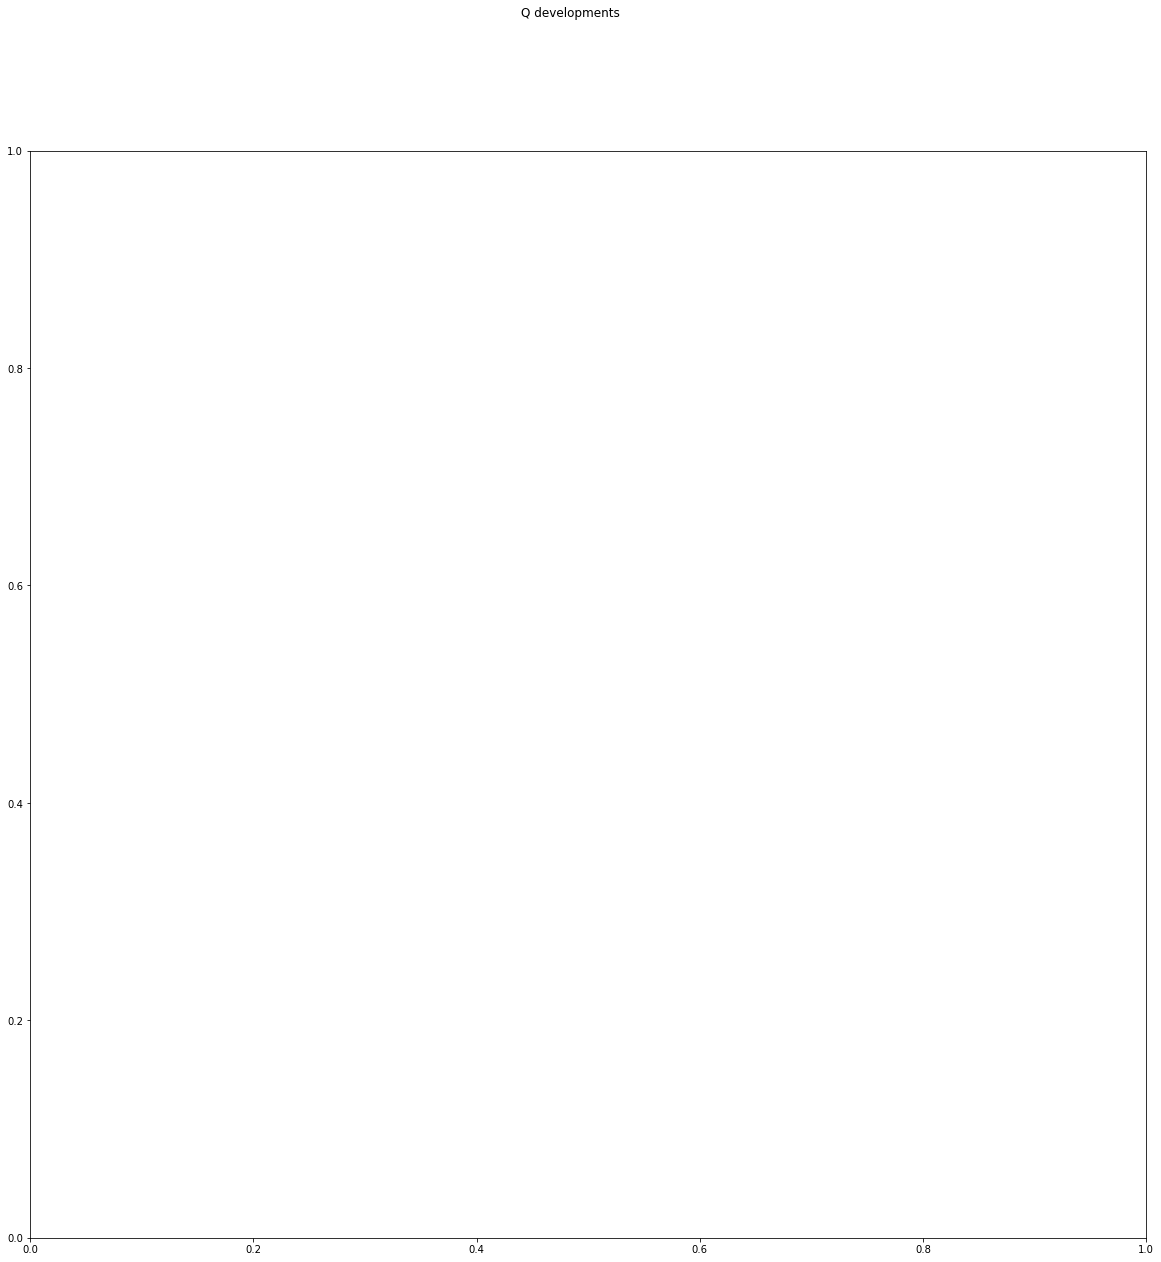

In [12]:
nbidders = len(names)
fig, ax = plt.subplots(figsize=(20,20))
title = "Q developments"
fig.suptitle(title, fontsize=12)
ax1 = plt.subplot(111)
for ix, Qlog in enumerate(Qlogs):
    Qlogdata = pd.read_csv(Qlog,
                             index_col = 0,
                             header = 0,
                             skip_blank_lines = False)
    Qlogdata["bids"] = Qlogdata["state"].apply(consthist)
#     print(Qlogdata.head())
    # Find number of last round
    maxround = Qlogdata.index.max()
#     print(maxround)
    Qbiddata = Qlogdata.where(Qlogdata.index == maxround)
    Qbiddata.drop(["phase", "state"], axis = 1, inplace = True)
    print(Qbiddata)

